Please upload the GoEmotions ZIP file


Saving DATA final year .zip to DATA final year .zip
Loaded 43410 training samples
Number of emotions: 28


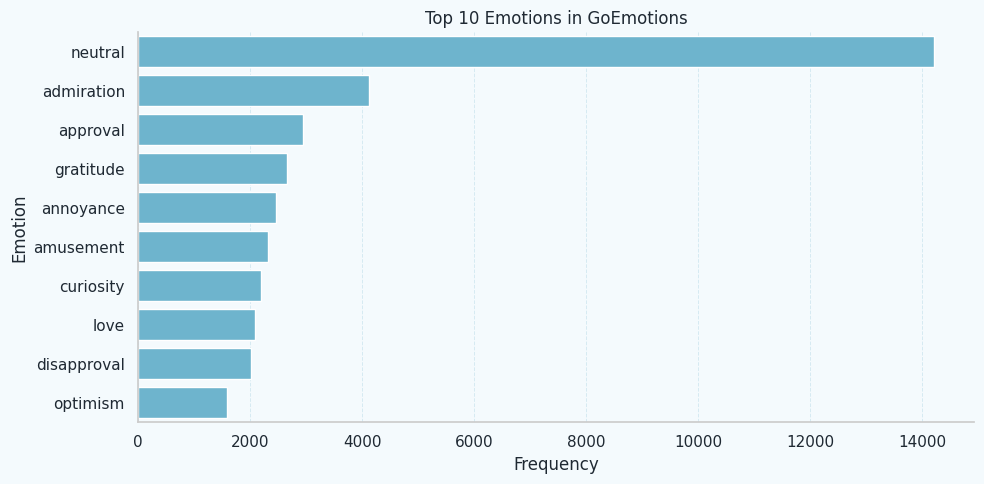

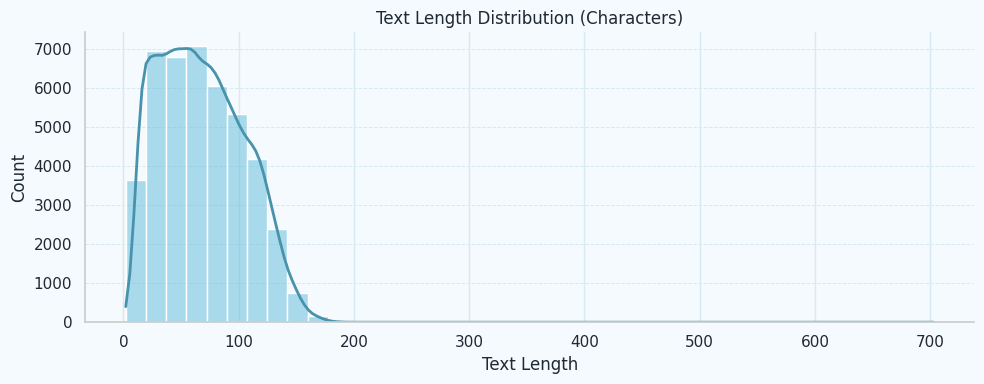

In [ ]:
# My AI Diary — GoEmotions EDA (Light Blue Theme)
# Exploring emotion distribution and text characteristics

import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from zipfile import ZipFile
from google.colab import files
from matplotlib.colors import to_rgb, to_hex

# ======================================================
# Upload and Extract ZIP (Colab)

print("Please upload the GoEmotions ZIP file")
uploaded = files.upload()

zip_path = list(uploaded.keys())[0]
os.makedirs("goemotions", exist_ok=True)

with ZipFile(zip_path, 'r') as z:
    z.extractall("goemotions")

# ======================================================
# Light Blue Theme (defined properly)

BRAND = "#5EBBDD"      # main soft blue
BG = "#F4FAFD"         # background
TEXT = "#1F2933"       # dark text
GRID = "#D6EAF2"       # grid colour

def darker(c, f=0.78):
    r, g, b = to_rgb(c)
    return to_hex((r*f, g*f, b*f))

BRAND_DARK = darker(BRAND)

sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.facecolor": BG,
    "axes.facecolor": BG,
    "axes.labelcolor": TEXT,
    "xtick.color": TEXT,
    "ytick.color": TEXT,
    "text.color": TEXT,
    "grid.color": GRID,
    "savefig.dpi": 300
})

# ======================================================
# Load the Data

def find_file(pattern):
    matches = [
        f for f in glob.glob(pattern, recursive=True)
        if not os.path.basename(f).startswith("._")
    ]
    if len(matches) == 0:
        raise FileNotFoundError(f"No files found for pattern: {pattern}")
    return matches[0]

train_path = find_file("goemotions/**/train.tsv")
emo_path   = find_file("goemotions/**/emotions.txt")

train = pd.read_csv(train_path, sep="\t", names=["text", "labels", "id"])

with open(emo_path, encoding="utf-8") as f:
    emotions = [e.strip() for e in f if e.strip()]

print(f"Loaded {len(train)} training samples")
print(f"Number of emotions: {len(emotions)}")

# ======================================================
# 1 — Top 10 Most Common Emotions

emotion_counts = Counter()

for label_str in train["labels"]:
    for l in str(label_str).split(","):
        if l.isdigit():
            emotion_counts[int(l)] += 1

df = pd.DataFrame({
    "Emotion": [emotions[i] for i in emotion_counts.keys()],
    "Count": list(emotion_counts.values())
}).sort_values("Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df.head(10),
    x="Count",
    y="Emotion",
    color=BRAND,
    edgecolor="white"
)
plt.title("Top 10 Emotions in GoEmotions")
plt.xlabel("Frequency")
plt.ylabel("Emotion")
plt.grid(axis="x", linestyle="--", linewidth=0.7)
sns.despine()
plt.tight_layout()
plt.savefig("top10_emotions.png", bbox_inches="tight")
plt.show()

# ======================================================
# 2 — Text Length Distribution

train["text_len"] = train["text"].astype(str).str.len()

plt.figure(figsize=(10, 4))
sns.histplot(
    train["text_len"],
    bins=40,
    color=BRAND,
    kde=True,
    edgecolor="white"
)

for line in plt.gca().lines:
    line.set_color(BRAND_DARK)
    line.set_linewidth(2)

plt.title("Text Length Distribution (Characters)")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", linewidth=0.7)
sns.despine()
plt.tight_layout()
plt.savefig("text_length_dist.png", bbox_inches="tight")
plt.show()
